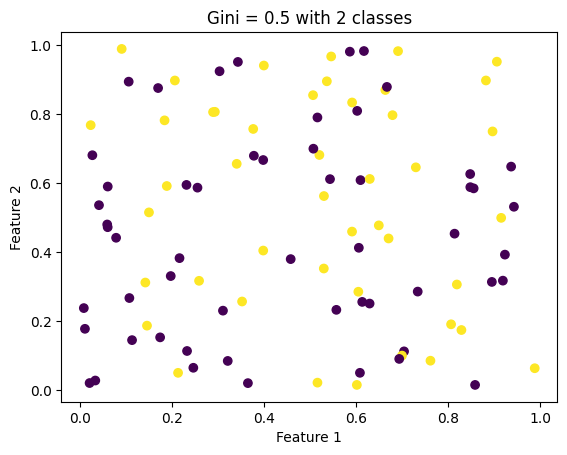

In [1]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 2 classes and 100 samples
# The GINI impurity should be = 0.5
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0.5 with 2 classes')

plt.show()

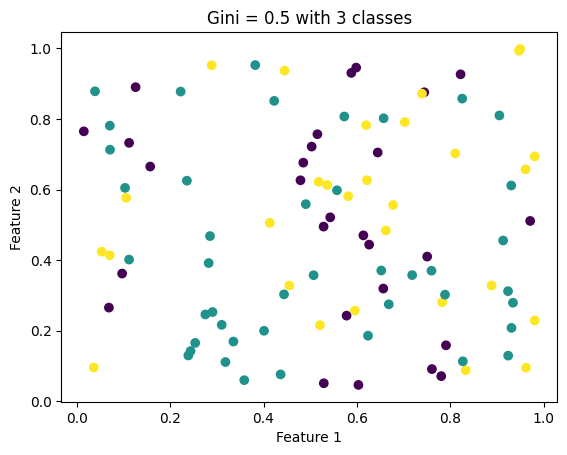

In [2]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 3 classes and 100 samples
# The GINI impurity should be = 0.5

X = np.random.rand(100, 2)
y = np.random.randint(0, 3, 100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0.5 with 3 classes')

plt.show()

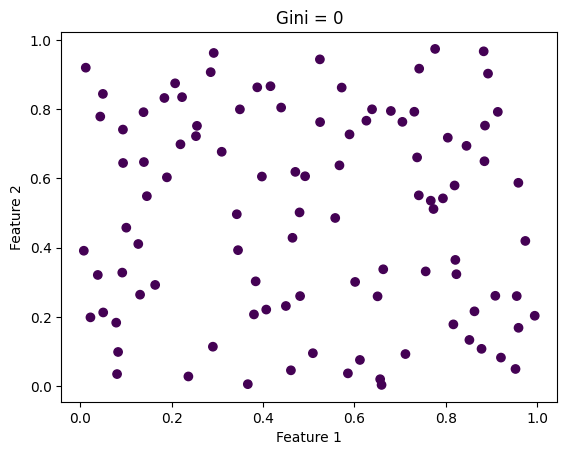

In [3]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 2 classes and 100 samples
# The GINI impurity should be = 0

X = np.random.rand(100, 2)
y = np.zeros(100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0')

plt.show()

In [4]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 198.0 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=ef87f17f7c958bce5e4f2f930c6e76dbb9b854875ba286f1995319e1f958ab88
  Stored in directory: /home/teguhteja/.cache/pip/wheels/77/54/7c/c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [10]:
# load assets/decision-tree-exercise.csv

import pandas as pd
import numpy as np

df = pd.read_csv('/home/teguhteja/Project/PythonProjects/ai-ruangguru/machine-learning/Decision Tree Exercise - Exercise.csv', header=1)
df.head()

,Ticket Price,Holiday duration,Jakarta PM 2.5,Temperature,Hectic in company?,Holiday to Bali,p Y,p N,Gini,Weighted Gini,...,Unnamed: 19,Ticket Price.2,Holiday duration.2,Jakarta PM 2.5.2,Temperature.2,Hectic in company?.2,Holiday to Bali.2,p Y.2,p N.2,Gini.2
0,1200000,10,198,35,Y,True,0.22,0.78,0.34,0.273498,...,NaN,1351732.0,5.0,113.0,31.0,N,False,0.038835,0.961165,0.07
1,1327806,10,191,39,Y,True,NaN,NaN,NaN,NaN,...,NaN,1098320.0,9.0,134.0,35.0,N,False,NaN,NaN,NaN
2,1351732,5,113,31,N,False,NaN,NaN,NaN,NaN,...,NaN,762981.0,5.0,106.0,35.0,N,False,NaN,NaN,NaN
3,1098320,9,134,35,N,False,NaN,NaN,NaN,NaN,...,NaN,1465470.0,6.0,157.0,32.0,N,False,NaN,NaN,NaN
4,649984,6,170,35,Y,True,NaN,NaN,NaN,NaN,...,NaN,1207302.0,7.0,107.0,35.0,N,False,NaN,NaN,NaN


In [11]:
# Build decision tree model using sci-kit learn

from sklearn.tree import DecisionTreeClassifier

columns = ["Ticket Price", "Holiday duration", "Jakarta PM 2.5", "Temperature", "Hectic in company?"]

# convert Hectic in company? (y/n) to numeric
df["Hectic in company?"] = df["Hectic in company?"].map({"Y": 1, "N": 0})

# convert "Holiday to Bali" (TRUE/FALSE) to numeric
df["Holiday to Bali"] = df["Holiday to Bali"].map({True: 1, False: 0})

X = df[columns]
y = df["Holiday to Bali"]

In [12]:
X

,Ticket Price,Holiday duration,Jakarta PM 2.5,Temperature,Hectic in company?
0,1200000,10,198,35,1
1,1327806,10,191,39,1
2,1351732,5,113,31,0
3,1098320,9,134,35,0
4,649984,6,170,35,1
...,...,...,...,...,...
195,530693,4,189,39,1
196,1488568,6,105,38,0
197,961120,7,162,36,1
198,721960,1,113,33,1


In [13]:
# Split data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

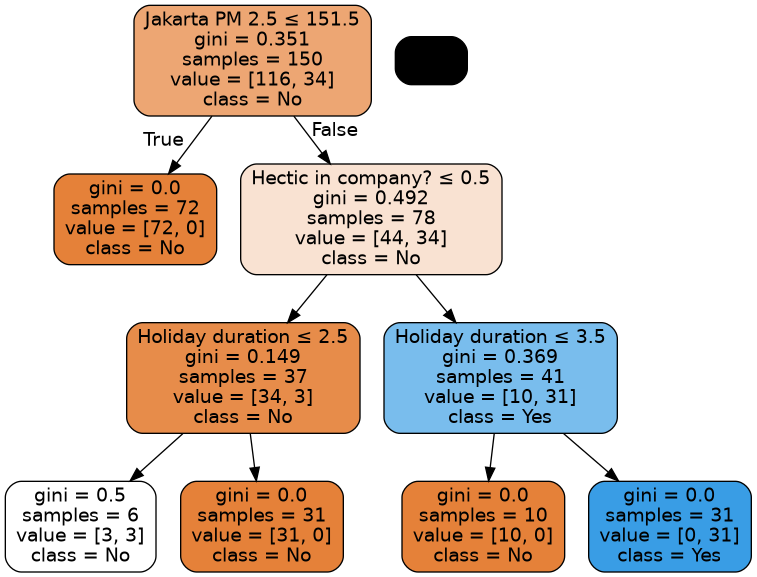

In [14]:
# Create model
model = DecisionTreeClassifier(max_depth=3)

# Train model
model.fit(X_train, y_train)

# Draw decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model, out_file=None, feature_names=columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [15]:
# Validate model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.98